In [26]:
#Différents imports
from pymatgen import Structure
from pymatgen.symmetry.analyzer import PointGroupAnalyzer
from pymatgen.symmetry.analyzer import SpacegroupOperations
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.core.operations import SymmOp  
from pymatgen.phonon.bandstructure import *
from pymatgen.phonon.plotter import*
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.ext.matproj import MPRester
import matplotlib.pyplot as plt
import numpy as np

In [27]:
#Téléchargement du fichier CIF
with MPRester("1fhLOrkpiXoSTmqx") as m :
    structure = m.get_phonon_bandstructure_by_material_id("mp-30847") # ID du TiSnPt  

# Zone de Brillouin
Représentation graphique des courbes de dispersion et représentation de la zone de Brillouin étudié.

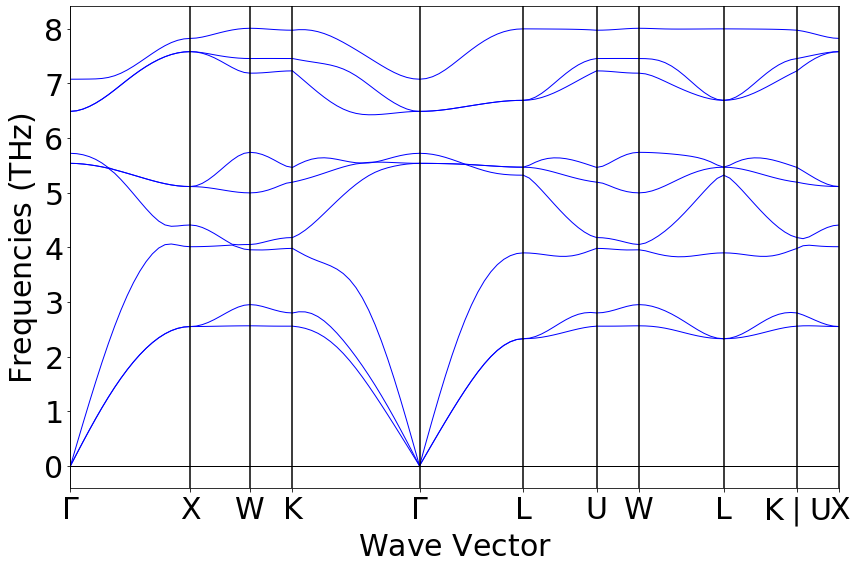

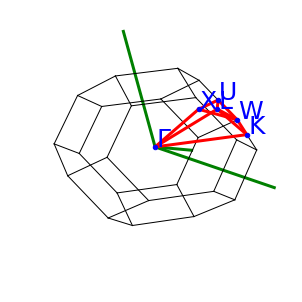

In [29]:
#Zone étudier
info = PhononBSPlotter(structure)
info.get_plot()
info.plot_brillouin()

# Calcule de la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin.

In [43]:
# Calculer des pentes
def pente1 (freq, q):
    return np.abs((freq[-1]-freq[-2])*10**12)/((q[-1]-q[-2])*10**10)

def pente2 (freq, q):
    return np.abs((freq[1]-freq[0])*10**12)/((q[1]-q[0])*10**10)

In [44]:
# Récupération des données:
d = info.bs_plot_data()
fr = d.get("frequency")
dis = d.get("distances")

Première branche acoustique :

In [51]:
branche_1 = fr[3][0]
vit_son1 = 2*np.pi*pente1(branche_1,dis[3])
print("La vitesse du son de la courbe 1 est de "+ str(vit_son1) + " m/s dans la direction Gamma vers K  ")

La vitesse du son de la courbe 1 est de 2190.0561787594606 m/s dans la direction Gamma vers K  


Deuxième branche acoustique :

In [52]:
branche_2 = fr[4][1]
vit_son2 = 2*np.pi*pente2(branche_2,dis[4])
print("La vitesse du son de la courbe 1 est de "+ str(vit_son2) + " m/s dans la direction Gamma vers L  ")

La vitesse du son de la courbe 1 est de 2336.480824332431 m/s dans la direction Gamma vers L  


Troisième branche :

In [53]:
branche_3 = fr[5][2]
vit_son3 = 2*np.pi*pente1(branche_3,dis[5])
print("La vitesse du son de la courbe 1 est de "+ str(vit_son3) + "m/s dans la direction Gamma vers  U  ")

La vitesse du son de la courbe 1 est de 474.69391653278825m/s dans la direction Gamma vers  U  


# Représentation Graphique :

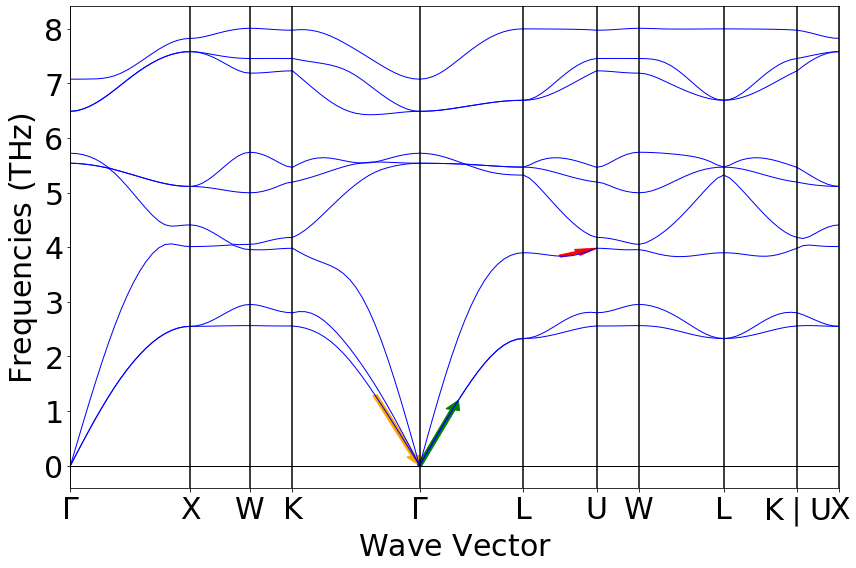

In [63]:
info.get_plot() # graphe des courbes de disperssion

# 1er pente --> orange :
plt.arrow(dis[3][13],branche_1[13],dis[3][-1]-dis[3][13],branche_1[-1]-branche_1[13], color= "orange",width=0.04,length_includes_head = True)

# 2ème pente --> vert :
plt.arrow(dis[4][0],branche_2[0],dis[4][6]-dis[4][0],branche_2[6]-branche_2[0], color= "green",width=0.04,length_includes_head = True)

# 3ème pente --> rouge
plt.arrow(dis[5][6],branche_3[6],dis[5][-1]-dis[5][6],branche_3[-1]-branche_3[6], color = "red",width = 0.04, length_includes_head = True)
